## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')

import tensorflow as tf
%load_ext tensorboard

import warnings
warnings.filterwarnings('ignore')

import os
import datetime as dt

Dataset is stored in Drive and link to drive is /content/drive/MyDrive/FinalProject/Datasets/gspc_final.csv

In [2]:
data = pd.read_csv("/content/gspc_final.csv")

In [3]:
data.head()

,Date,Open,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
0,03-01-2006,1248.290039,1268.800049,NaN,0.000000,NaN,NaN,NaN,89.839996,11.14,4.34,4.7,91.2
1,04-01-2006,1268.800049,1273.459961,1245.73999,0.196947,NaN,NaN,NaN,89.139999,11.37,4.22,4.7,91.2
2,05-01-2006,1273.459961,1273.479980,1245.73999,0.371553,NaN,NaN,NaN,89.330002,11.31,4.24,4.7,91.2
3,06-01-2006,1273.479980,1285.449951,1245.73999,1.030907,NaN,NaN,NaN,88.849998,11.00,4.22,4.7,91.2
4,09-01-2006,1285.449951,1290.150024,1245.73999,1.810155,NaN,NaN,NaN,89.250000,11.13,4.25,4.7,91.2


In [4]:
data.isna().sum()

Date        0
Open        0
Close       0
SAR         1
MACD        0
RSI         8
ATR        49
MFI        29
USDX        2
VIX         0
EFFR       35
UNRATE      0
UMSCENT     0
dtype: int64

In [5]:
data.drop(data.index[:49], inplace=True)

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

In [6]:
data.head()

,Date,Open,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
0,15-03-2006,1297.479980,1303.020020,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
1,16-03-2006,1303.020020,1305.329956,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2,17-03-2006,1305.329956,1307.250000,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
3,20-03-2006,1307.250000,1305.079956,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
4,21-03-2006,1305.079956,1297.229980,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


In [7]:
data.isna().sum()

Date        0
Open        0
Close       0
SAR         0
MACD        0
RSI         0
ATR         0
MFI         0
USDX        2
VIX         0
EFFR       35
UNRATE      0
UMSCENT     0
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data.set_index("Date",inplace=True)
data.head()

,Open,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
Date,,,,,,,,,,,,
2006-03-15,1297.479980,1303.020020,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
2006-03-16,1303.020020,1305.329956,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2006-03-17,1305.329956,1307.250000,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
2006-03-20,1307.250000,1305.079956,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
2006-03-21,1305.079956,1297.229980,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


In [9]:
data = data.fillna(data.mean())
data.isna().sum()

Open       0
Close      0
SAR        0
MACD       0
RSI        0
ATR        0
MFI        0
USDX       0
VIX        0
EFFR       0
UNRATE     0
UMSCENT    0
dtype: int64

In [10]:
len(data)

4397

In [12]:
output_dir_path = "/content/sample_data/OuputDir"

##Data Exploration

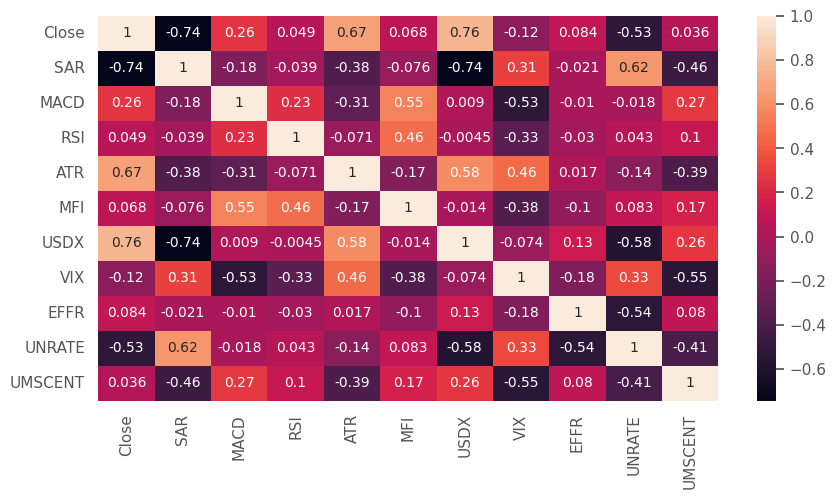

In [13]:
data = data.iloc[:, 1:]
fig = plt.figure(figsize= (10,5))
sns.heatmap(data.corr(), annot=True)
sns.set_style("whitegrid")
plt.show()

## Denoising Data

In [14]:
data.head()

,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
Date,,,,,,,,,,,
2006-03-15,1303.020020,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
2006-03-16,1305.329956,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2006-03-17,1307.250000,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
2006-03-20,1305.079956,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
2006-03-21,1297.229980,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


In [15]:
from skimage.restoration import (denoise_wavelet, estimate_sigma)

data['Close']= denoise_wavelet(data.iloc[:, 0], wavelet='haar',
                                      #method='BayesShrink',
                                      method='VisuShrink',
                                      mode='soft', rescale_sigma = True)
data.head()

,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
Date,,,,,,,,,,,
2006-03-15,1297.479562,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
2006-03-16,1297.479562,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2006-03-17,1297.479562,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
2006-03-20,1297.479562,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
2006-03-21,1297.479562,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


In [17]:
data.describe()

,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000
mean,2216.078954,989.352357,9.961819,55.994301,28.674883,53.891476,88.777090,19.870871,1.299982,6.016352,80.222766
std,1059.511080,404.539485,36.226028,19.770110,20.503058,10.139617,9.272771,9.110330,1.721908,2.205442,13.047978
min,728.323895,666.789978,-212.441916,0.000000,8.880007,22.365246,71.330002,9.140000,0.040000,3.400000,50.000000
25%,1346.052412,666.789978,-2.658452,42.061798,14.784806,46.742932,80.480003,13.740000,0.100000,4.300000,70.600000
50%,1971.031453,666.789978,14.138794,56.496934,20.522988,53.825806,89.129997,17.500000,0.200000,5.100000,80.900000
75%,2842.568211,1576.089966,25.995324,70.086803,35.086426,61.071333,96.570000,23.110001,1.990000,7.800000,91.900000
max,4748.140636,1576.089966,107.397605,99.566735,123.041602,89.979368,114.110001,82.690002,5.410000,14.700000,101.400000


##Importing Machine Learning Libraries

In [16]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
import math

##Supporting Functions

In [18]:
def mean_absolute_percentage_error(y_true, y_pred):
    return (np.mean(np.abs((y_true - y_pred)/(y_true))*100))

def calculate_scores(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  R = np.corrcoef(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)

  print(f"Mean Absolute Error (MAE): {mae:.4f}")
  print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
  print(f"Mean Squared Error (MSE): {mse:.4f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
  print(f"R-Pearson Correlation Coefficient (R): {R[0,1]:.4f}")
  print(f"R-squared (R2): {r2:.4f}")
  dic = {'rmse':rmse, 'R': R[0,1], 'mape': mape}
  return (dic)



def DatasetCreation(dataset, time_step = 1):  ##defining a function that gives a dataset and a time step, which then returns the input and output data
   DataX, DataY = [], []
   for i in range(len(dataset)- time_step -1):
         a = dataset[i:(i+ time_step), ]
         DataX.append(a)
         DataY.append(dataset[i + time_step, 0]) #ydata consists close price
   return np.array(DataX), np.array(DataY)


def data_split(data, split = 0.2):
  #======= creating training and test data===#
  l1   = int(len(data) * (1- split))
  l2    = len(data) - l1
  data1  = data.iloc[0:l1,:]
  data2   = data.iloc[l1:len(data),:]
  return data1, data2

def min_max_transform(data, feature_range=(0, 1)):
   scaler = MinMaxScaler(feature_range)
   return scaler.fit_transform(data)

def min_max_inverse_transform(data_scaled, min_original, max_original):
    return min_original +  data_scaled*(max_original - min_original)

def write_dic_to_file(dic_name, file_name):
  file = open(file_name, 'w')
  file.write(str(dic_name))
  file.close()

import ast
def read_dic_from_file(file_name):
  file = open(file_name, "r")
  contents = file.read()
  dictionary = ast.literal_eval(contents)
  file.close()
  return dictionary

##Supporting Functions for Result Visualization

In [19]:
def true_pred_plot(model_output):

  y_train = model_output['datasets']['y_train']
  y_test =  model_output['datasets']['y_test']

  train_pred = model_output['best_model']['train_predictions']
  test_pred = model_output['best_model']['test_predictions']

  ##====== Visualizing true vs predicted plots ========#
  fig = plt.figure(figsize= (14,5))
  plt.subplot(121)
  plt.scatter(y_train, train_pred, marker= "+", color = 'mediumblue')
  identity_line = np.linspace(max(min(y_train), min(train_pred)), min(max(y_train), max(train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth= 2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("Training data (a)")

  plt.subplot(122)
  plt.scatter(y_test, test_pred, marker = "+", color = 'mediumblue')
  identity_line = np.linspace(max(min(y_test), min(test_pred)), min(max(y_test), max(test_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth= 2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("Test data (b)")

  plt.suptitle("Scatter plot of True vs Predicted Close prices")
  plt.show()


def best_model_prediction_plot(model_output):

  time_step =  model_output['hyper_parameters']['time_step']

  data = model_output['datasets']['data']

  train_predict_plot_data = np.empty_like(data.values[:,0])# extracting closing price
  train_predict_plot_data[:] = np.nan

  test_predict_plot_data = np.empty_like(data.values[:,0])
  test_predict_plot_data[:] = np.nan

  fig = plt.figure(figsize = (14,5))

  plt.subplot(121)

  train_pred = model_output['best_model']['train_predictions']
  test_pred = model_output['best_model']['test_predictions']

  train_predict_plot_data[time_step:len(train_pred)+ time_step] =  train_pred
  test_predict_plot_data[len(train_pred)+(time_step*2)+1:len(data.values)-1] = test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')

  plt.subplot(122)
  plt.plot(data.values[len(train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value'], loc='upper left')


def create_visualization(model_output):
  print("==================== Scatter Plot ==========================")
  true_pred_plot(model_output)
  print("==================== Line Plot ==========================")
  best_model_prediction_plot(model_output)

## Function for Building Model

In [20]:
def build_model(layers, time_step, num_features, optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  model = Sequential()

  for i in range(len(layers)):
    if len(layers)==1:
      model.add(LSTM(int(layers[i]), input_shape = (time_step, num_features)))
    else:
      if i < len(layers)-1:
        if i == 0:
          model.add(LSTM(int(layers[i]), input_shape=(time_step, num_features), return_sequences= True))
          #model.add(Dropout(0.4456))
        else:
          model.add(LSTM(int(layers[i]), return_sequences=True))
          #model.add(Dropout(0.10))
      else:
        model.add(LSTM(int(layers[i])))
        #model.add(Dropout(0.10))
  model.add(Dense(1, activation = 'linear'))

  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! Please apply your optimizer manually...")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model

In [21]:
optimizers_names = ['Adam', 'Adagrad', 'Nadam']

build_model([250], 5, 10, optimizers_names[2], 0.001, 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               261000    
                                                                 
 dense (Dense)               (None, 1)                 251       
                                                                 
Total params: 261251 (1020.51 KB)
Trainable params: 261251 (1020.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


##Function for Hyperparameter Tuning

## Building Multi-Layer LSTM Models

In [22]:
def multi_layer_LSTM_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):
    #====== data transformation==========#
    print("Progress: Performing data preparation steps.......\n")

    #======= creating training and test data===#

    train_data, test_data = data_split(data, test_split)

    num_features = train_data.shape[1]

    min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
    min_test, max_test   =  test_data["Close"].min(), test_data["Close"].max()

    train_data_scaled  =  min_max_transform(train_data)
    test_data_scaled   = min_max_transform(test_data)


    X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
    X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

    y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
    y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


    #============ arrays for collecting test scores ================#
    rmse_array = np.zeros(num_replicates)
    mape_array = np.zeros(num_replicates)
    R_array    = np.zeros(num_replicates)
    elapsed_time_array = np.zeros(num_replicates)

    models_history = []
    train_predictions = []
    test_predictions = []

    for i in range(num_replicates):

      print("Program is running for %d replicate ----->\n" %i)

      model = build_model(layers, time_step, num_features, optimizer = hyper_parameters[0], learning_rate = hyper_parameters[1], verbose = 0)
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train, batch_size = hyper_parameters[2], epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      models_history.append(history)


      #==============Making train and test prediction in original scales ==========
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train) #in original scale
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions.append(train_pred)
      test_predictions.append(test_pred)

      #============== Calculating performance scores==========
      scores =   calculate_scores(min_max_inverse_transform(y_test, min_test, max_test),test_pred)

      rmse_array[i] =  scores['rmse']
      mape_array[i] =  scores['mape']
      R_array[i] = scores['R']
      elapsed_time_array[i] = elapsed_time

    min_index = rmse_array.argmin()
    best_rmse = rmse_array[min_index]
    mape_with_best_rmse = mape_array[min_index]
    R_with_best_rmse =  R_array[min_index]
    elapsed_time_with_best_rmse = elapsed_time_array[min_index]

    train_predictions_with_best_rmse = train_predictions[min_index]
    test_predictions_with_best_rmse = test_predictions[min_index]

    loss_with_best_rmse = models_history[min_index].history['loss']


    #======= Collecting average test scores =============#
    all_scores = {'rmse': rmse_array, 'mape': mape_array, 'R': R_array, 'elapsed_time': elapsed_time_array}

    avg_scores = {'rmse': np.mean(rmse_array),
                  'mape': np.mean(mape_array),
                  'R': np.mean(R_array),
                  'elapsed_time': np.mean(elapsed_time_array)}

    #======= Collecting standard deviations of scores =============#
    stds = {'rmse': np.std(rmse_array),
              'mape': np.std(mape_array),
                  'R': np.std(R_array),
                  'elapsed_time': np.std(elapsed_time_array)}

    #======= Collecting minimum values of test scores =============#
    minimums = {'rmse': np.min(rmse_array),
                'mape': np.min(mape_array),
                'R': np.min(R_array),
                'elapsed_time': np.min(elapsed_time_array)}



    #======= Collecting maximum values of test scores =============#
    maximums = {'rmse': np.max(rmse_array),
                'mape': np.max(mape_array),
                'R': np.max(R_array),
                'elapsed_time': np.max(elapsed_time_array)}


    model_with_best_rmse = {
                            'replicate': min_index,
                            'rmse': best_rmse,
                            'mape': mape_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            'loss':loss_with_best_rmse,
                         }
     #======= Collecting hyperparameters=============#
    hyper_parameters = {'layers': layers,
                        'model_specific_hyper_parameters': hyper_parameters,#additional best_hyper_parmeters for each models
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                        }



    datasets  =   {'data': data,
                  'X_train': X_train,
                  'X_test': X_test,
                  'y_train': y_train_original,
                  'y_test': y_test_original
                  }

    #======= Collecting all the outputs together =============#
    output_dictionary = {'hyper_parameters': hyper_parameters,
                        'best_model': model_with_best_rmse,
                        'all_scores': all_scores,
                        'avg_scores': avg_scores,
                        'standard deviations': stds,
                        'minimums': minimums,
                        'maximums': maximums,
                        'train_predictions': train_predictions,
                        'test_predictions':  test_predictions,
                        'datasets': datasets
                       }

    return output_dictionary

In [23]:
def run_multi_layer_LSTM_Model(hidden_layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):

  num_models = len(hidden_layers)

  #== to collect all scores===#
  rmse = []
  mape = []
  R = []
  elapsed_time = []

  #===to collect all avg scores===#
  avg_rmse = []
  avg_mape = []
  avg_R = []
  avg_elapsed_time = []

  #=== to iteratively update the best rmse and the corresponding model
  best_avg_rmse = 99999999999
  best_rmse = 99999999999
  best_model_hidden_layers = None
  best_model_output = None

  for i in range(num_models):
    print("Running model with hidden neurons: ", hidden_layers[i])

    print("\n")

    print("Best Hyper_parameters used: ", hyper_parameters[i])

    print("\n")

    output = multi_layer_LSTM_Model(hidden_layers[i], hyper_parameters[i], data, time_step, test_split, epochs, num_replicates)

    rmse.append(output['all_scores']['rmse'])
    mape.append(output['all_scores']['mape'])
    R.append(output['all_scores']['R'])
    elapsed_time.append(output['all_scores']['elapsed_time'])

    avg_rmse.append(output['avg_scores']['rmse'])
    avg_mape.append(output['avg_scores']['mape'])
    avg_R.append(output['avg_scores']['R'])
    avg_elapsed_time.append(output['avg_scores']['elapsed_time'])

    if avg_rmse[i] < best_avg_rmse:
      best_avg_rmse = avg_rmse[i]
      best_rmse = output['best_model']['rmse']
      best_model_hidden_layers = hidden_layers[i]
      best_model_output = output


  rmse = np.array(rmse)
  mape = np.array(mape)
  R =  np.array(R)

  # ===== Collecting all  scores================================#
  scores = {'layers': hidden_layers, 'rmse': rmse, 'mape': mape, 'R':R, 'elapsed_time': elapsed_time}

  # ======= Collecting avg scores ===============================#
  avg_scores = pd.DataFrame({'layers': hidden_layers, 'rmse': np.array(avg_rmse), 'mape': np.array(avg_mape), 'R':np.array(avg_R), 'elapsed_time':np.array(avg_elapsed_time)})

  #======= Collecting standard deviations of scores =============#
  stds = pd.DataFrame({'layers': hidden_layers, 'rmse': np.std(rmse, axis = 1), 'mape': np.std(mape, axis = 1), 'R':  np.std(R, axis = 1 ),  'elapsed_time': np.std(elapsed_time, axis = 1 )})

  #======= Collecting minimum values of test scores =============#
  minimums = pd.DataFrame({'layers': hidden_layers, 'rmse': np.min(rmse, axis =1 ), 'mape': np.min(mape, axis= 1), 'R': np.min(R, axis =1), 'elapsed_time': np.min(elapsed_time, axis =1)})

  #======= Collecting maximum values of test scores =============#
  maximums = pd.DataFrame({'layers': hidden_layers, 'rmse': np.max(rmse, axis =1), 'mape': np.max(mape, axis =1), 'R': np.max(R, axis =1),  'elapsed_time': np.max(elapsed_time,axis =1)})

  output_dictionary = {
                     'hyper_parameters': hyper_parameters[i],
                     'scores': scores,
                     'avg_scores': avg_scores,
                     'stds':stds,
                     'minimums': minimums,
                     'maximums': maximums,
                      'best_avg_rmse': best_avg_rmse,
                      'best_rmse': best_rmse,
                      'best_model_hidden_layers': best_model_hidden_layers,
                      'best_model_output': best_model_output
                      }


  print("\nBest model and its avg rmse and minimum rmse):\n", best_model_hidden_layers, best_avg_rmse, best_rmse)
  print('\nAverage scores:\n', avg_scores)
  print('\nStandard_deviations:\n', stds)
  print('\nMinimums:\n', minimums)
  print('\nMaximums:\n', maximums)


  #Save all rmse scores in the file for future analysis
  pd.DataFrame(scores['rmse']).to_csv(output_dir_path+'ml-lstm-all-rmse.csv')

  #writing output dictionary in the file
  file_name = output_dir_path + "ml-lstm-results.txt"
  write_dic_to_file(output_dictionary, file_name)

  print("Progress: All works are done successfully, congratulations!!\n")

  return output_dictionary

# Mulit Layer LSTM

In [24]:
hidden_layers = [[40, 10], [10, 10, 45]]

best_hyper_parameters_multilayers  = [['Adam', 0.0201, 8],
                                     ['Adam', 0.0115, 9]]

ml_model_output = run_multi_layer_LSTM_Model(hidden_layers, best_hyper_parameters_multilayers, data, time_step = 5, test_split = 0.2, epochs = 100,  num_replicates = 15)

Running model with hidden neurons:  [40, 10]


Best Hyper_parameters used:  ['Adam', 0.0201, 8]


Progress: Performing data preparation steps.......

Program is running for 0 replicate ----->

Epoch 1/100
439/439 [==============================] - 7s 6ms/step - loss: 0.0036
Epoch 2/100
439/439 [==============================] - 3s 7ms/step - loss: 3.3623e-04
Epoch 3/100
439/439 [==============================] - 2s 6ms/step - loss: 4.8936e-04
Epoch 4/100
439/439 [==============================] - 2s 6ms/step - loss: 2.7105e-04
Epoch 5/100
439/439 [==============================] - 3s 6ms/step - loss: 2.0706e-04
Epoch 6/100
439/439 [==============================] - 3s 7ms/step - loss: 2.3732e-04
Epoch 7/100
439/439 [==============================] - 3s 6ms/step - loss: 1.3477e-04
Epoch 8/100
439/439 [==============================] - 2s 6ms/step - loss: 2.1483e-04
Epoch 9/100
439/439 [==============================] - 3s 6ms/step - loss: 1.9683e-04
Epoch 10/100
439/439 [===============